sklearn

Some initial information about sklearn's API:

> Machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be **[n_samples, n_features]**.

**n_samples**: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.

**n_features**: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays. 

Estimator parameters: All the parameters of an estimator can be set when it is instantiated.

Every algorithm is exposed in scikit-learn via an `Estimator` object. For instance a linear regression is: `sklearn.linear_model.LinearRegression`

See an example below:

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

print(model.normalize)

True


In [3]:
print(model)

LinearRegression(normalize=True)


Let's try fitting to `numpy` arrays:

In [5]:
import numpy as np

x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

Notice below that an axis must be added to the `x` array, API requires it.

In [6]:
x

array([0, 1, 2])

In [7]:
model.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

You should receive 
`ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.`

In [8]:
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X

array([[0],
       [1],
       [2]])

In [9]:
model.fit(X, y)

LinearRegression(normalize=True)

Estimated parameters: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [10]:
model.coef_

array([1.])

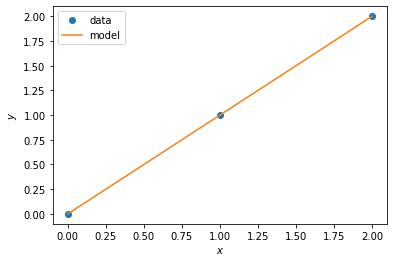

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, 'o', label='data')
plt.plot(X, X * model.coef_, label='model')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend()

As the above fit is perfect, the mean square difference between the data and model should be 0.

Let's look at an example in which the fit is not perfect.

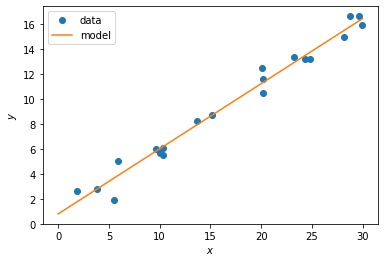

In [20]:
# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.plot(x, y, 'o', label='data')
plt.plot(x_new, y_new, label='model')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend()

Next, let's see how nearest-neighbor classificator works on the iris dataset.

Plot the decision boundary of nearest neighbor decision on iris using 3 nearest neighbors.

The iris dataset can be loaded directly from `sklearn`.

In [22]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()

Let's select two columns from iris as data for classifier:

In [24]:
X = iris.data[:, :2]

As target values we take:

In [25]:
y = iris.target

Initialize the classifier and fit the data:

In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

We want to test all boundary values. To define a grid for prediction, use this:

In [27]:
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

We must flatten the data when passing to `predict`:

In [28]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

And then reshape it back to the grid's shape:

In [29]:
Z = Z.reshape(xx.shape)

Now everything is ready. Let's plot the grid and the training points:

/home/jr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0, 0.5, 'sepal width (cm)')

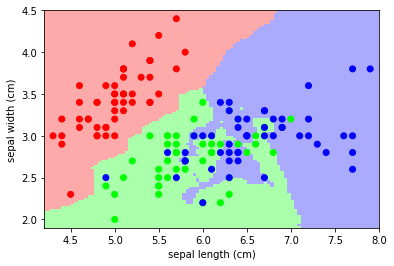

In [33]:
from matplotlib.colors import ListedColormap

cmap_l = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_b = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_l)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_b)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

So when new testing points will be available, we can estimate their label based on the trained classifier.

Another example, we will try to use an SVM.
> In machine learning, support-vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

See more: https://en.wikipedia.org/wiki/Support-vector_machine

Importing looks like this:

In [37]:
from sklearn import svm

We want to generate some linear data to test an SVM. This will be generated using the following function:

In [39]:
def linear_model(rseed=42, n_samples=30):
    " Generate data according to a linear model"
    np.random.seed(rseed)

    data = np.random.normal(0, 10, (n_samples, 2))
    data[:n_samples // 2] -= 15
    data[n_samples // 2:] += 15

    labels = np.ones(n_samples)
    labels[:n_samples // 2] = -1

    return data, labels

In [61]:
X, y = linear_model()

Features look like this:

In [41]:
X

array([[-10.03285847, -16.38264301],
       [ -8.52311462,   0.23029856],
       [-17.34153375, -17.34136957],
       [  0.79212816,  -7.32565271],
       [-19.69474386,  -9.57439956],
       [-19.63417693, -19.65729754],
       [-12.58037728, -34.13280245],
       [-32.24917833, -20.62287529],
       [-25.1283112 , -11.85752667],
       [-24.08024076, -29.12303701],
       [ -0.34351231, -17.257763  ],
       [-14.32471795, -29.24748186],
       [-20.44382725, -13.8907741 ],
       [-26.50993577, -11.24301982],
       [-21.0063869 , -17.9169375 ],
       [  8.98293388,  33.52278185],
       [ 14.86502775,   4.42289071],
       [ 23.22544912,   2.7915635 ],
       [ 17.08863595,  -4.59670124],
       [  1.71813951,  16.96861236],
       [ 22.3846658 ,  16.71368281],
       [ 13.84351718,  11.98896304],
       [  0.2147801 ,   7.80155792],
       [ 10.39361229,  25.57122226],
       [ 18.4361829 ,  -2.63040155],
       [ 18.24083969,  11.1491772 ],
       [  8.23078   ,  21.11676289],
 

And then the labels:

In [43]:
y

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

Let's check first how the data look:

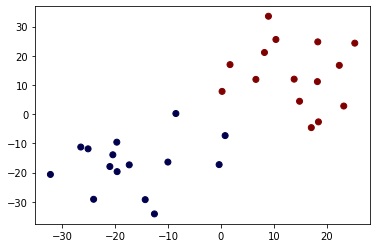

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.seismic)

We can see that we have data that is characterized by two labels: 1 and -1

Create an SVM object using a linear kernel (since the data is also linear) and use it to fit the above data:

In [53]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

Plot it:

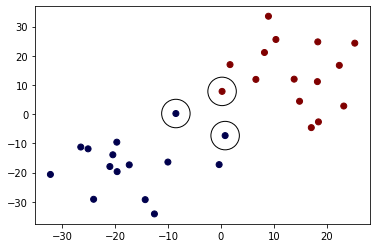

In [64]:
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=810, edgecolors="k", facecolors="none")

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.seismic)

The selected blue points characterize the linear boundary and the selected red point its width.

-----

That was fairly easy. Let's do the same but for a nonlinear data.

Change a little our function to generate data in which separation is nonlinear.

In [65]:
def nonlinear_model(rseed=42, n_samples=30):
    radius = 40 * np.random.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = np.random.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels

Split the data into the features and the labels:

In [66]:
X, y = nonlinear_model()

In [67]:
X

array([[ 13.16204101,  -6.2241544 ],
       [  0.99870588,  -2.61215923],
       [ -9.15136241, -10.17266605],
       [  9.88985047, -10.33980731],
       [ 11.58763685, -33.04850793],
       [ 11.87616831,  28.20435182],
       [ 33.2454427 , -26.61439389],
       [-20.14587762,  -5.08392781],
       [  1.85818548,  -4.92314289],
       [ 27.19479159, -20.79735257],
       [-15.13276148,  33.23463033],
       [ 20.75302882,  17.17980605],
       [  5.11405767,  36.65135575],
       [-19.48783601,   9.6066148 ],
       [ 10.39928913, -22.8346642 ],
       [ 12.05750564, -14.4395484 ],
       [  1.11737471,   0.0488397 ],
       [ -4.73640339,  -0.32032354],
       [ -1.20083345,   0.68583354],
       [  5.32617723,  30.07979048],
       [ 10.09085445,   9.4598923 ],
       [-12.76997656,  20.80489883],
       [ 40.79043118, -15.29353825],
       [ -4.86908862,   9.8289279 ],
       [-17.93114451,  -2.1269317 ],
       [-10.55071674, -34.6978113 ],
       [ -6.5922379 ,   7.60850117],
 

In [68]:
y

array([ 1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,
        1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.])

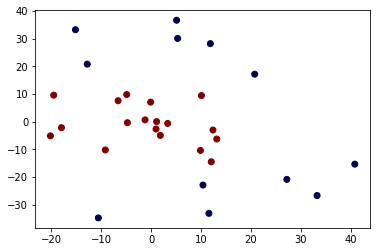

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.seismic)

We can see that the red points are grouped within the blue points.

Fit the data to an SVM with the radial basis functions as kernel. As you can see, typically selecting a kernel other than linear required providing some parameters.

In [70]:
clf = svm.SVC(kernel='rbf', gamma=0.001, coef0=0, degree=3)
clf.fit(X, y)

SVC(coef0=0, gamma=0.001)

See how it went below. In this case we will plot the decision boundary explicitly:

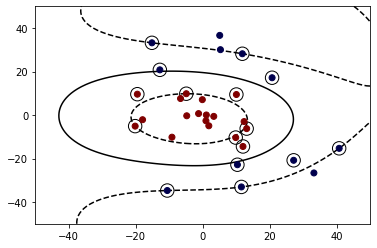

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.seismic, zorder=2)

plt.scatter(clf.support_vectors_[:, 0], 
            clf.support_vectors_[:, 1],
            s=180, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)

X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

plt.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
            linestyles=['dashed', 'solid', 'dashed'], zorder=1)

That's it for today. Next time we will look at some more advanced examples of unsupervised machine learning.